Correlation Matrix:
                sediment_thick       gwt    predom      vs30       dem  \
sediment_thick        1.000000 -0.216763  0.842865 -0.714979 -0.612316   
gwt                  -0.216763  1.000000 -0.253263  0.247926  0.106787   
predom                0.842865 -0.253263  1.000000 -0.740071 -0.632388   
vs30                 -0.714979  0.247926 -0.740071  1.000000  0.572196   
dem                  -0.612316  0.106787 -0.632388  0.572196  1.000000   
pga                   0.324652  0.247579  0.301166 -0.395725 -0.393711   
geo_form              0.279673 -0.152896  0.388118 -0.227223 -0.265748   
near_dis             -0.376476  0.024184 -0.446482  0.357406  0.317857   
near_dis_norm        -0.377148  0.024713 -0.447509  0.358859  0.318728   
near_dist            -0.422079  0.013253 -0.515818  0.432735  0.414401   
LIQ                   0.736590 -0.247550  0.807827 -0.638401 -0.564791   

                     pga  geo_form  near_dis  near_dis_norm  near_dist  \
sediment_thick  0

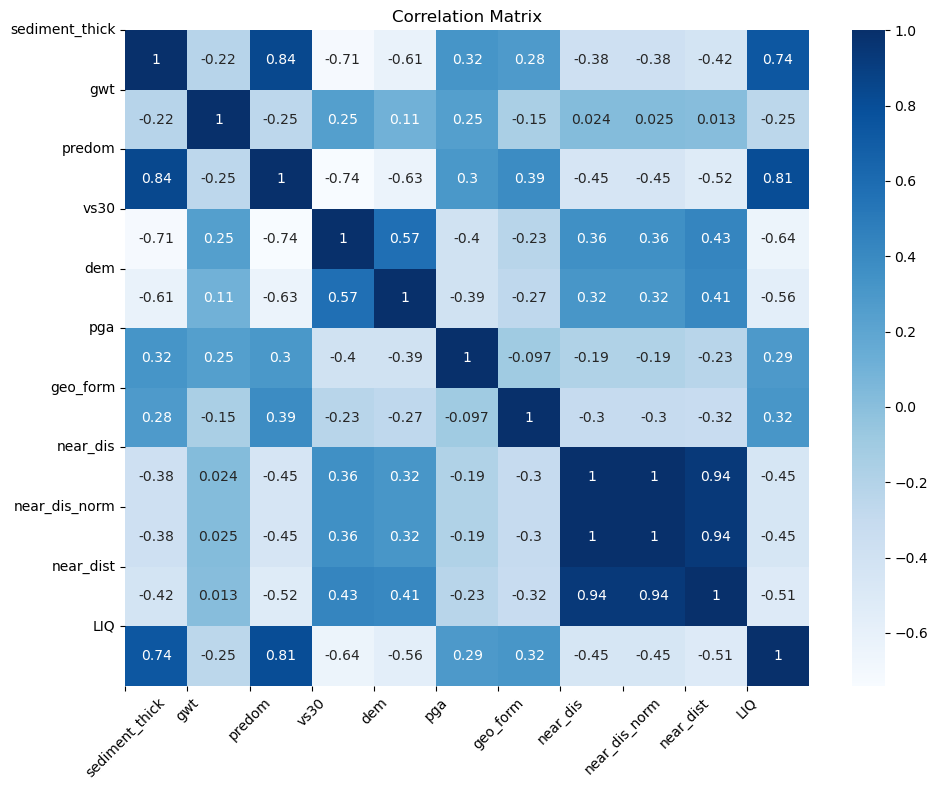

Variance Inflation Factor (VIF):
        VIF        features
0  2.769109        near_dis
1  8.492843  sediment_thick
2  8.988764          predom
3  8.696044            vs30
4  5.027700             pga
5  6.135978        geo_form
Best Hyperparameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 120}
Feature Importance (Information Gain Ratio):
Feature 1: near_dis (importance: 0.178)
Feature 2: sediment_thick (importance: 0.313)
Feature 3: predom (importance: 0.381)
Feature 4: vs30 (importance: 0.249)
Feature 5: pga (importance: 0.156)
Feature 6: geo_form (importance: 0.347)


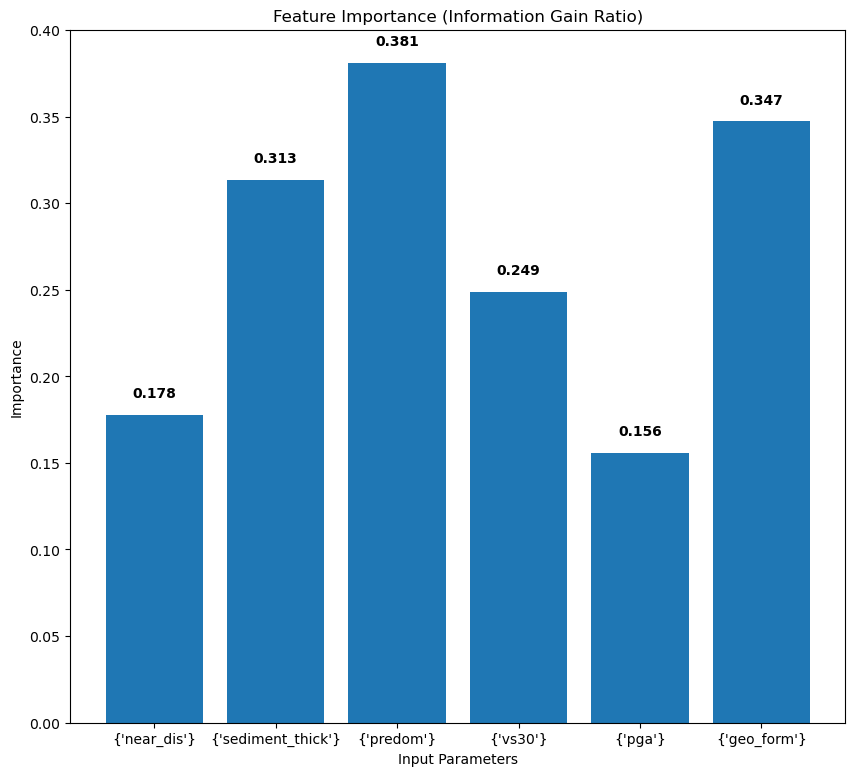

Accuracy: 0.939
Precision: 0.905
Recall: 0.905
F1 Score: 0.905
AUC Score (Test): 0.975
AUC Error (Test): 0.025
Cohen Kappa Score: 0.860


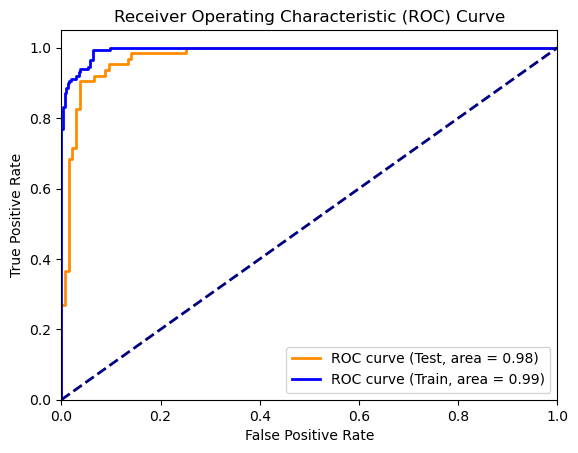

Confusion Matrix:
[[129   6]
 [  6  57]]
True Positive Rate: 0.905
False Positive Rate: 0.044
True Negative Rate: 0.956
False Negative Rate: 0.095


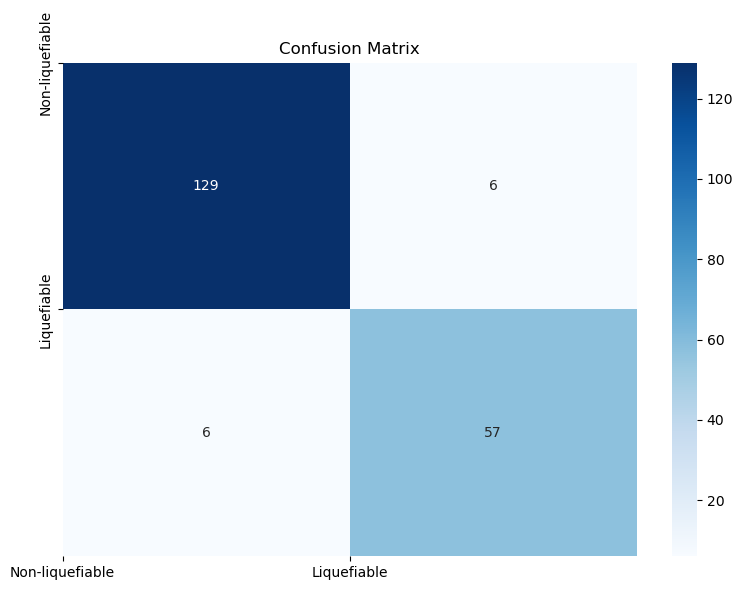

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif

# Define constants
TEST_SIZE = 0.3
RANDOM_STATE = 36

# Manually input hyperparameters

#N_ESTIMATORS = [100, 200, 300, 400, 500]
#MAX_DEPTH = [None, 10, 20, 30]
#min_samples_split: [2, 5, 10],
#min_samples_leaf: [1, 5, 10],
#max_features: ['auto', 'sqrt', 'log2']

n_estimators = 120
max_depth = 15
min_samples_split = 10
min_samples_leaf = 1
max_features = 'auto'

# Load the dataset from a CSV file
file_path = "C:\\Users\\LE\\Downloads\\THESIS\\Program\\CSV\\GRID_LABEL_KTMBASIN_classify_v2.2.csv"
data = pd.read_csv(file_path)

# Calculate correlation of the dataset
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Draw heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns)
plt.tight_layout()
plt.show()

# Preprocess the data
#X = data[["NEAR_DIST", "sediment_thick", "vs30", "predom", "pga", "geomap"]]
X = data[["near_dis", "sediment_thick", "predom", "vs30", "pga", "geo_form"]]
y = data["LIQ"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Calculate VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
print("Variance Inflation Factor (VIF):")
print(vif)

# Perform hyperparameter tuning
param_grid = {
    'n_estimators': [n_estimators],
    'max_depth': [max_depth],
    'min_samples_split': [min_samples_split],
    'min_samples_leaf': [min_samples_leaf],
    'max_features': [max_features]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Select a model based on the problem's requirements
model_type = "classifier"
if model_type == "classifier":
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE, oob_score=True)
elif model_type == "regressor":
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# For Evaluation Metrics
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# To Predict Probabilities For Liquefaction Susceptibility Mapping
y_pred_proba_train = best_model.predict_proba(X_train)
y_pred_proba_test = best_model.predict_proba(X_test)

# Print predicted probabilities
#print("Predicted Probabilities (Train):")
#print(y_pred_proba_train)
#print("Predicted Probabilities (Test):")
#print(y_pred_proba_test)

# Calculate feature importance using Information Gain Ratio
information_gain_ratio = mutual_info_classif(X_train, y_train)
print("Feature Importance (Information Gain Ratio):")
for i, importance in enumerate(information_gain_ratio):
    print(f"Feature {i+1}: {X.columns[i]} (importance: {importance:.3f})")

# Draw bar chart for feature importance using Information Gain Ratio
plt.figure(figsize=(10, 9))
plt.bar(range(len(information_gain_ratio)), information_gain_ratio, align="center")
plt.xticks(range(len(information_gain_ratio)), [{X.columns[i]} for i in range(len(information_gain_ratio))])
plt.xlabel("Input Parameters")
plt.ylabel("Importance")
plt.title("Feature Importance (Information Gain Ratio)")
for i,v in enumerate(information_gain_ratio):
    plt.text(i,v+0.01,f"{v:.3f}", ha="center", weight="bold")
plt.show()

# Evaluate the model
if model_type == "classifier":
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auc_score_test = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    auc_error_test = 1 - auc_score_test
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"AUC Score (Test): {auc_score_test:.3f}")
    print(f"AUC Error (Test): {auc_error_test:.3f}")
    print(f"Cohen Kappa Score: {kappa:.3f}")
    
    # Plot AUROC curve for test data
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Plot AUROC curve for train data
    y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    # Plot AUROC curves for both test and train data
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test, area = %0.2f)' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train, area = %0.2f)' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

elif model_type == "regressor":
    y_pred_test = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)

    # Draw scatter plot of predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual Values")
    plt.show()

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_mat)

# Calculate true positive rate, false positive rate, true negative rate, false negative rate
tn, fp, fn, tp = conf_mat.ravel()
tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fnr = fn / (fn + tp)  # False negative rate

print(f"True Positive Rate: {tpr:.3f}")
print(f"False Positive Rate: {fpr:.3f}")
print(f"True Negative Rate: {tnr:.3f}")
print(f"False Negative Rate: {fnr:.3f}")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt = '.0f')
plt.title("Confusion Matrix")
tick_marks = [i for i in range(2)]
plt.xticks(tick_marks, ["Non-liquefiable", "Liquefiable"], rotation=0)
plt.yticks(tick_marks, ["Non-liquefiable", "Liquefiable"])
plt.tight_layout()
plt.show()

In [4]:
mean_score = accuracy_score(y_test, y_pred_test)
print("Mean Score:", mean_score)

Mean Score: 0.9393939393939394


In [5]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

0.06060606060606061
0.24618298195866548


In [11]:
import numpy as np

# Calculate standard deviation of each input parameter
std_near_dis = np.std(X_train['near_dis'])
std_sediment_thick = np.std(X_train['sediment_thick'])
std_vs30 = np.std(X_train['vs30'])
std_predom = np.std(X_train['predom'])
std_pga = np.std(X_train['pga'])
std_geo_form = np.std(X_train['geo_form'])

# Calculate tolerance as 10% of standard deviation
tol_near_dis = std_near_dis * 0.1
tol_sediment_thick = std_sediment_thick * 0.1
tol_vs30 = std_vs30 * 0.1
tol_predom = std_predom * 0.1
tol_pga = std_pga * 0.1
tol_geo_form = std_geo_form * 0.1

print("Tolerance of input parameters:")
print(f"near_dis: {tol_near_dis:.3f}")
print(f"sediment_thick: {tol_sediment_thick:.3f}")
print(f"vs30: {tol_vs30:.3f}")
print(f"predom: {tol_predom:.3f}")
print(f"pga: {tol_pga:.3f}")
print(f"geomap: {tol_geo_form:.3f}")

Tolerance of input parameters:
near_dis: 0.194
sediment_thick: 0.227
vs30: 0.062
predom: 0.298
pga: 0.210
geomap: 0.397


In [80]:
import geopandas as gpd
import numpy as np
import rasterio
import geocube
import rioxarray as rxr
from rasterio.transform import Affine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from geocube.api.core import make_geocube

# Read the shapefile
gdf = gpd.read_file(r'D:\\ARC GIS\\KTM VALLEY\\WGS_1984_UTM_ZONE_45N\\GRID\\GRID_LABEL_KTMBASIN_Classify_v2.2.shp')

# Predict probabilities
y_pred_proba_test = best_model.predict_proba(X_test)

# Repeat the predictions to match the number of features
y_pred_proba_repeated = np.repeat(y_pred_proba_test[:, 1], len(gdf) // len(y_pred_proba_test) + 1)[:len(gdf)]

# Create a new DataFrame with the repeated predictions
df = pd.DataFrame(y_pred_proba_repeated, columns=['LSM'])

# Reset the index of the GeoDataFrame to create a unique index
gdf.reset_index(drop=True, inplace=True)

# Assign the repeated predictions to a new column in the GeoDataFrame
gdf['LSM'] = df['LSM']

# Set the CRS
gdf.set_crs(epsg=32645, inplace=True)

# Save the GeoDataFrame to a new shapefile
gdf.to_file(r'D:\\ARC GIS\\KTM VALLEY\\WGS_1984_UTM_ZONE_45N\\METHOD 2\\Classify_v2.2\\method2_grid_1_0.3_36_RFM_CLassify_v2.2.shp')

### FOR RASTER OUTPUT ###

# Get the overall bounds of the GeoDataFrame
minx, miny, maxx, maxy = gdf.total_bounds

# Convert the GeoPandas DataFrame to a raster
raster = make_geocube(vector_data=gdf, measurements=['LSM'], resolution=(10000, 10000))

# Save the raster to a file
raster.rio.to_raster("D:\\ARC GIS\\KTM VALLEY\\WGS_1984_UTM_ZONE_45N\METHOD 2\\Classify_v2.2\\method2_grid_1_0.3_36_RFM_CLassify_v2.2.tif")

In [11]:
### TO PRINT THE PREDICTED DATA ###

import pandas as pd

# Create a DataFrame with X_test, y_test, and y_pred_test
df = pd.DataFrame(X_test, columns=X.columns)
df['LIQ'] = y_test
df['Predicted_LIQ'] = y_pred_test

# Print the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

# Export the DataFrame to an Excel file
#df.to_excel('output_RFM.xlsx', index=False)

     near_dis  bedrockdep  predom  vs30  pga  geo_form  LIQ  Predicted_LIQ
100      1.03           6       9     2    5         7    1              1
170      1.17           7       9     2    4        13    1              1
315      6.78           1       2     2    8         4    0              0
445      1.10           1       1     3    1         9    0              0
428      3.91           3       1     3    2         8    0              0
254      0.05           3       8     2    4        11    1              1
490      2.59           1       1     3    1         9    0              0
60       2.59           1       1     3    5         6    0              0
524      2.55           1       1     3    1         9    0              0
135      0.03           7       9     2    5        11    1              1
348      1.31           1       1     3    5         3    0              0
334      7.45           1       1     3    4         2    0              0
495      1.99           1

In [103]:
# Converting the point shapefile to raster.
# We will use the model prediction (column LSM in gdf to make a raster)
from geocube.api.core import make_geocube
import rasterio as rio

out_grid = make_geocube(vector_data=gdf, measurements=["LSM"], resolution=(10000, 10000))
out_grid["LSM"].rio.to_raster("D:\\ARC GIS\\KTM VALLEY\\WGS_1984_UTM_ZONE_45N\METHOD 2\\Raster\\method2_grid_1_RF_0.3_36_v2.tif")

Correlation Matrix:
                  Id  EASTING_X  NORTHING_Y  NEAR_DIST  bedrockdep       gwt  \
Id          1.000000   0.992609    0.992609   0.184710   -0.014659 -0.503268   
EASTING_X   0.992609   1.000000    1.000000   0.201224    0.036075 -0.526195   
NORTHING_Y  0.992609   1.000000    1.000000   0.201224    0.036075 -0.526195   
NEAR_DIST   0.184710   0.201224    0.201224   1.000000   -0.374233  0.046478   
bedrockdep -0.014659   0.036075    0.036075  -0.374233    1.000000 -0.216763   
gwt        -0.503268  -0.526195   -0.526195   0.046478   -0.216763  1.000000   
predom      0.077754   0.118491    0.118491  -0.434952    0.842865 -0.253263   
vs30       -0.040734  -0.086495   -0.086495   0.348986   -0.714979  0.247926   
dem_ktm     0.020399  -0.021518   -0.021518   0.289869   -0.612316  0.106787   
pga        -0.672943  -0.619569   -0.619569  -0.163342    0.324652  0.247579   
geomap      0.207581   0.204588    0.204588  -0.310323    0.279673 -0.152896   
LIQ         0.055129

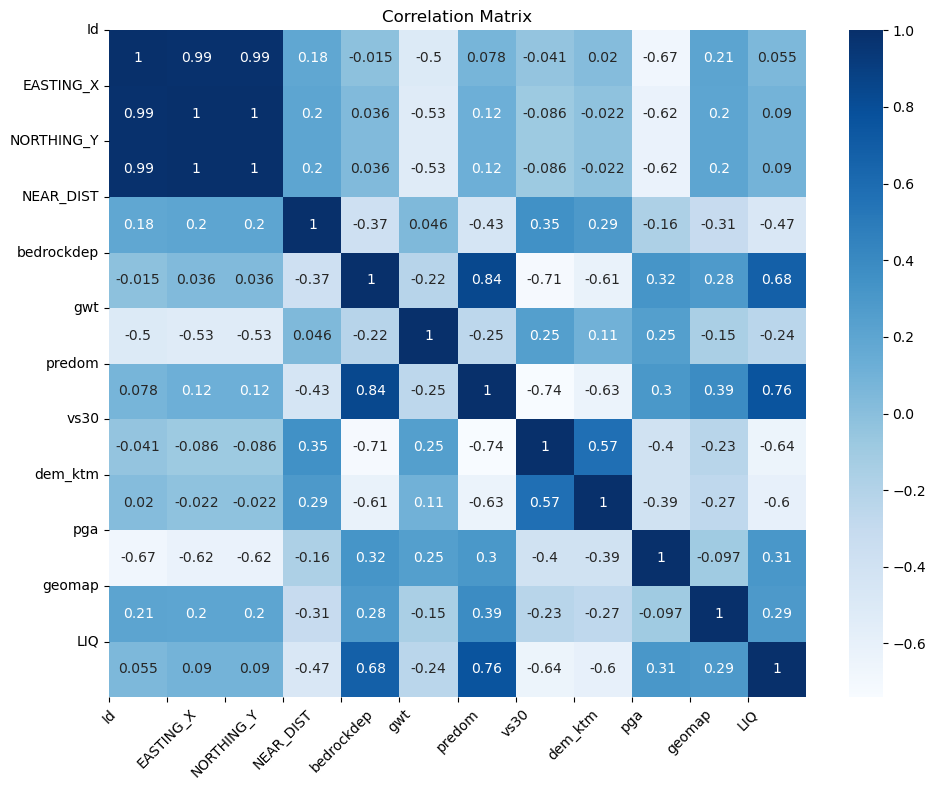

Variance Inflation Factor (VIF):
        VIF    features
0  2.633816   NEAR_DIST
1  8.467769  bedrockdep
2  8.504540        vs30
3  8.949885      predom
4  5.025018         pga
5  6.160987      geomap
Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Feature Importance (Information Gain Ratio):
Feature 1: NEAR_DIST (importance: 0.184)
Feature 2: bedrockdep (importance: 0.269)
Feature 3: vs30 (importance: 0.261)
Feature 4: predom (importance: 0.371)
Feature 5: pga (importance: 0.186)
Feature 6: geomap (importance: 0.333)


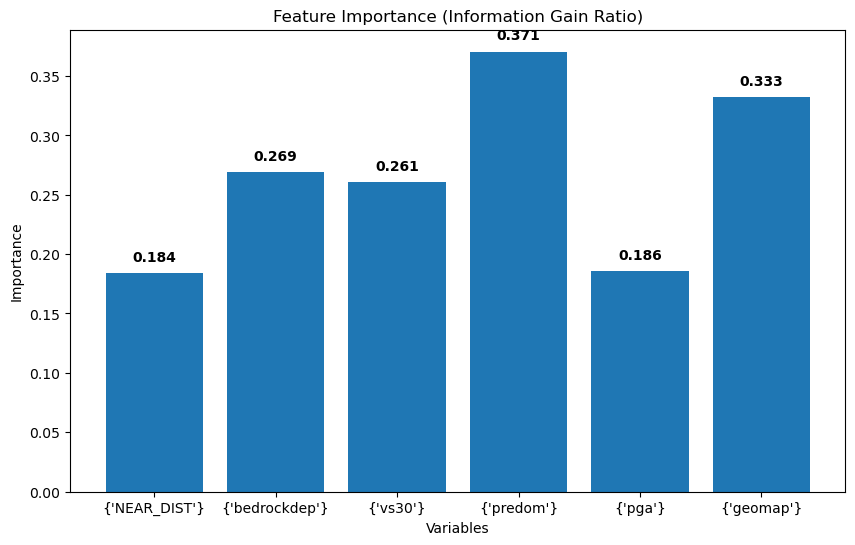

Accuracy: 0.879
Precision: 0.845
Recall: 0.822
F1 Score: 0.833
AUC Score (Test): 0.950
AUC Error (Test): 0.050
Cohen Kappa Score: 0.738


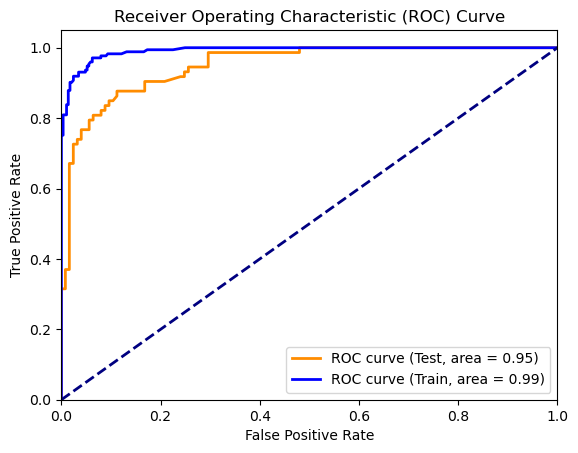

Confusion Matrix:
[[114  11]
 [ 13  60]]
True Positive Rate: 0.822
False Positive Rate: 0.088
True Negative Rate: 0.912
False Negative Rate: 0.178


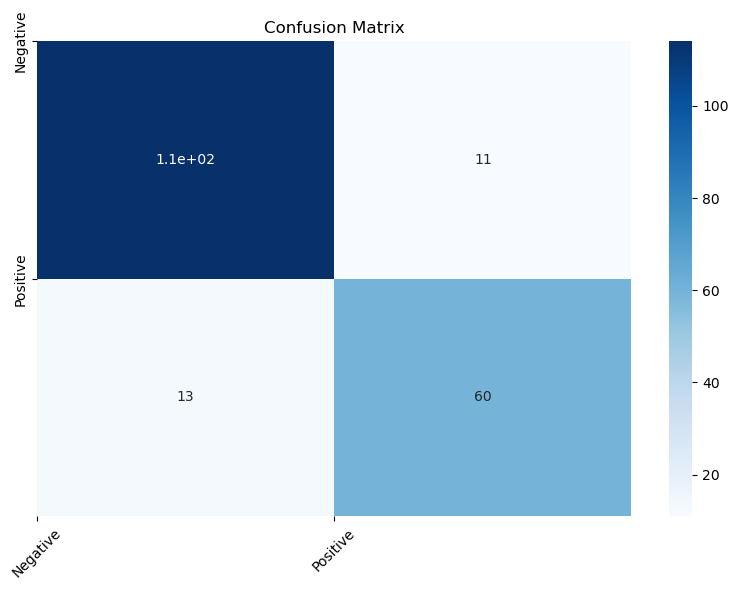

In [50]:
### FOR HYPERTUNING ###
## MINIMUM ETA = 60 MINUTES ##

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif

# Define constants
TEST_SIZE = 0.3
RANDOM_STATE = 36
N_ESTIMATORS = [100, 200, 300, 400, 500]
MAX_DEPTH = [None, 10, 20, 30]

# Load the dataset from a CSV file
file_path = "C:\\Users\\LE\\Downloads\\THESIS\\Program\\CSV\\GRID_LABEL_KTMBASIN_1KM_Classify.csv"
data = pd.read_csv(file_path)

# Calculate correlation of the dataset
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Draw heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns)
plt.tight_layout()
plt.show()

# Preprocess the data
X = data[["NEAR_DIST", "bedrockdep", "vs30", "predom", "pga", "geomap"]]
y = data["LIQ"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Calculate VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
print("Variance Inflation Factor (VIF):")
print(vif)

# Perform hyperparameter tuning
param_grid = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Select a model based on the problem's requirements
model_type = "classifier"
if model_type == "classifier":
    model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=RANDOM_STATE, oob_score=True)
elif model_type == "regressor":
    model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=RANDOM_STATE)


# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate feature importance using Information Gain Ratio
information_gain_ratio = mutual_info_classif(X_train, y_train)
print("Feature Importance (Information Gain Ratio):")
for i, importance in enumerate(information_gain_ratio):
    print(f"Feature {i+1}: {X.columns[i]} (importance: {importance:.3f})")

# Draw bar chart for feature importance using Information Gain Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(len(information_gain_ratio)), information_gain_ratio, align="center")
plt.xticks(range(len(information_gain_ratio)), [{X.columns[i]} for i in range(len(information_gain_ratio))])
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Feature Importance (Information Gain Ratio)")
for i,v in enumerate(information_gain_ratio):
    plt.text(i,v+0.01,f"{v:.3f}", ha="center", weight="bold")
plt.show()

# Evaluate the model
if model_type == "classifier":
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auc_score_test = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    auc_error_test = 1 - auc_score_test
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"AUC Score (Test): {auc_score_test:.3f}")
    print(f"AUC Error (Test): {auc_error_test:.3f}")
    print(f"Cohen Kappa Score: {kappa:.3f}")
    
    # Plot AUROC curve for test data
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Plot AUROC curve for train data
    y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    # Plot AUROC curves for both test and train data
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test, area = %0.2f)' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train, area = %0.2f)' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

elif model_type == "regressor":
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.3f}")

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_mat)

# Calculate true positive rate, false positive rate, true negative rate, false negative rate
tn, fp, fn, tp = conf_mat.ravel()
tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fnr = fn / (fn + tp)  # False negative rate

print(f"True Positive Rate: {tpr:.3f}")
print(f"False Positive Rate: {fpr:.3f}")
print(f"True Negative Rate: {tnr:.3f}")
print(f"False Negative Rate: {fnr:.3f}")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
tick_marks = [i for i in range(2)]
plt.xticks(tick_marks, ["Negative", "Positive"], rotation=45)
plt.yticks(tick_marks, ["Negative", "Positive"])
plt.tight_layout()
plt.show()